# Notebook Setup Stuff


In [0]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [0]:
!pip install keras tensorflow numpy mnist

# You, Me & Machine Learning

![sorting images of handwritten numbers into the digits they represent](https://bryanbrattlof.com/you-me-machines-learning/handwritten-six-to-type.png)

In this notebook, we’ll introduce some terms and how each component of a neural network works together to tackle a classic computer vision problem: analyze thousands of MNIST images of handwritten numbers and sort them (with 97.88% accuracy) into the digits they represent.

## Download

Now that we’ve built our working environment, we can download the images and begin preparing them for our neural network. Thankfully the MNIST library makes downloading thousands of images as simple as importing a module in a new python file.

In [0]:
import mnist

# Download MNIST Images
training_images = mnist.train_images()
testing_images = mnist.test_images()

# Download MNIST Labels
training_labels = mnist.train_labels()
testing_labels = mnist.test_labels()

print(type(training_images))
print(training_images.shape)
print(training_images.max())
print(training_images.min())


Printing out some statistics about our NumPy array tells us each image (60,000 images in the training set) is in a 28 by 28 pixel matrix, with each pixel having a value between 0 and 255 (an 8-bit number) to tell our computers how “on” that pixel should be. The higher the pixel’s value the more “on” that pixel will be.

![alt text](https://bryanbrattlof.com/you-me-machines-learning/number-6-with-pixel-values.png)

And while this is great for our human eyes, this isn’t a great format for our neural network. Meaning, like all true data scientists, we have to massage some data.

## Normalizing

For our images, we'll only need to scale their range from their current values [0 - 255] into a more standard range [0 - 1]. We can do this using a min-max feature scaling funciton:

![alt text](https://bryanbrattlof.com/you-me-machines-learning/min-max-feature-scaling-function.png)

In [0]:
training_images = training_images.astype('float32')

training_max = training_images.max()
training_min = training_images.min()

training_images_norm = (
  (training_images - training_min) / 
  (training_max - training_min)
)


In [0]:
testing_images = testing_images.astype('float32')

testing_max = testing_images.max()
testing_min = testing_images.min()

testing_images_norm = (
  (testing_images - testing_min) / 
  (testing_max - testing_min)
)


## Flattening

Our neural network will also expect each image to be in a long 1 dimensional list of pixels. This means we'll need to "flatten" our images by removing it's 2nd dimension before we can start training our neural network.

To “flatten” our images , we simply need to call NumPy’s reshape() method and specify a list of dimensions we want our new matrix in.

In [0]:
training_images_norm = training_images_norm.reshape((-1, 784))
testing_images_norm = testing_images_norm.reshape((-1, 784))

In [0]:
print(training_images_norm.shape)
print(training_images.max())
print(training_images.min())

(60000, 784)


## One-Hot Encoding

In order to train our neural network, we need to convert our labels from their perfectly human readable base-10 digit into a 10 item list format called “one-hot” encoding.

Without getting into too much detail, our neural network will have 10 output neurons with each neuron representing the probability of an image representing any digit in our 0-9 range.

![alt text](https://bryanbrattlof.com/you-me-machines-learning/one-hot-6.png)

We need to transform our labels into the probabilities that those 10 output neurons should output, effectively telling our neural network that we’re 100% sure this image is a 6.

In [0]:
import numpy as np

training_labels = np.eye(10)[training_labels]
testing_labels = np.eye(10)[testing_labels]

print(training_labels[:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Building Our Neural Network

The type of neural network we’ll be building is called a feed-forward neural network. It’s essentially a single stack of layers, where each layer of neurons feeds their information forward to the next layer, making the Sequential API a perfect fit for our project.

![alt text](https://bryanbrattlof.com/you-me-machines-learning/neural-network-model.png)


In [0]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.
W0825 23:19:31.514752 140163978192768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Typically each neuron in a layer will connect to every neuron from the adjacent layer, forming a fully interconnected (dense) layer of connections.

![alt text](https://bryanbrattlof.com/you-me-machines-learning/dense-layer.png)

## Adding Layers

For the first layer in our model, we'll be connecting the 784 neurons in our input layer (the pixels in our images) to the 512 neurons in our hidden layer.

In [0]:
from keras.layers import Dense
model.add(Dense(512, activation='relu', input_shape=(784,)))

W0825 23:19:31.538742 140163978192768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 23:19:31.544829 140163978192768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Our last Dense layer will be the output of our neural network. This layer will need 10 output neurons, one for each digit our image could be.

For the activation function, we'll use the softmax function, which allows us to calculate the activation of the 10 output neurons relative to each other. (eg: "I'm 20% sure this is a 4")

![alt text](https://bryanbrattlof.com/you-me-machines-learning/softmax-activation-function.png)

In [0]:

model.add(Dense(10, activation='softmax'))

# Compiling Our Model

Now that we're done building the structure of our neural network, we can work on the methods and algorithms it will use to “learn” as we compile our neural network.


In [0]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

W0825 23:19:31.599591 140163978192768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 23:19:31.630641 140163978192768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# How To Train Your Model

In [0]:
history = model.fit(
  x=training_images_norm,
  y=training_labels,
  epochs=5,
  batch_size=64,
  validation_data=(testing_images_norm, testing_labels)
)

W0825 23:19:31.746025 140163978192768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0825 23:19:31.805648 140163978192768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2275 - acc: 0.9338 - val_loss: 0.1133 - val_acc: 0.9663
Epoch 2/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0886 - acc: 0.9732 - val_loss: 0.0810 - val_acc: 0.9752
Epoch 3/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0565 - acc: 0.9827 - val_loss: 0.0741 - val_acc: 0.9777
Epoch 4/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.0410 - acc: 0.9872 - val_loss: 0.0656 - val_acc: 0.9793
Epoch 5/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.0288 - acc: 0.9912 - val_loss: 0.0711 - val_acc: 0.9788


# How We Did

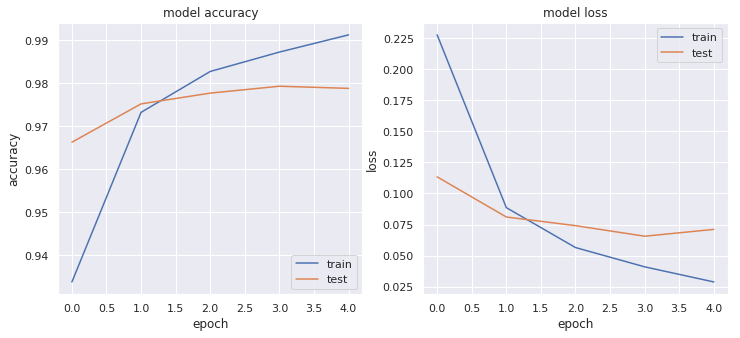

In [0]:
fig = plt.figure(figsize=(12,5))

# summarize history for accuracy
pl1 = fig.add_subplot(1, 2, 1)
pl1.plot(history.history['acc'])
pl1.plot(history.history['val_acc'])
pl1.set_title('model accuracy')
pl1.set_ylabel('accuracy')
pl1.set_xlabel('epoch')
pl1.legend(['train', 'test'], loc='lower right')

# summarize history for loss
pl2 = fig.add_subplot(1, 2, 2)
pl2.plot(history.history['loss'])
pl2.plot(history.history['val_loss'])
pl2.set_title('model loss')
pl2.set_ylabel('loss')
pl2.set_xlabel('epoch')
pl2.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
model.evaluate(
    testing_images_norm,
    testing_labels,
    verbose=0
)


[0.07108291857463774, 0.9788]

**97.88% Accuracy!!!**

Not bad for a simple feed-forward neural network.